<center><h1> Banking Data Project </header1></center>

# Libraries import

In [122]:
# In this project it will be import the next libraries:
# Pandas, Numpy, Matplotlib, Seaborn, Scikit-learn tensorflow
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Upload Dataset

In [123]:
#Code for upload Dataset

url_train = r'C:\Users\hugor\Desktop\H\Proyectos\Banca\train.csv'

url_test = r'C:\Users\hugor\Desktop\H\Proyectos\Banca\test.csv'


# Datasets description

The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. We have two datasets:
- train.csv: 45,211 rows and 18 columns ordered by date (from May 2008 to November 2010)
- test.csv: 4521 rows and 18 columns with 10% of the examples (4521), randomly selected from train.csv

We got these columns to evaluate if the bank could give a loan for each person: 
- 1 - age (numeric)
- 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
- 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- 4 - education (categorical: "unknown","secondary","primary","tertiary")
- 5 - default: has credit in default? (binary: "yes","no")
- 6 - balance: average yearly balance, in euros (numeric)
- 7 - housing: has housing loan? (binary: "yes","no")
- 8 - loan: has personal loan? (binary: "yes","no")

Related with the last contact of the current campaign:
- 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
- 10 - day: last contact day of the month (numeric)
- 11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
- 12 - duration: last contact duration, in seconds (numeric)

Other attributes:
- 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- 15 - previous: number of contacts performed before this campaign and for this client (numeric)
- 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
- 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

The dataset was obtained from the Kaggle platform, a public website for data science projects.

Link to Kaggle dataset: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets?resource=download&select=test.csv

# Problem to be solve

The main problem to solve is to predict whether a bank client will subscribe to a term deposit based on their personal and demographic data, as well as information related to previous marketing interactions. By identifying clients who are most likely to subscribe, the bank can optimize its marketing campaigns, reduce costs, and improve conversion rates.

# Datasets Characteristics

## Train Dataset

In [145]:
from pandas import read_csv

# We save the dataset in df by reading the csv file, knowing that it is separated by ','
df = pd.read_csv( url_train, sep=';', on_bad_lines='skip')

# We print the header of the dataset to get an idea of ​​its contents
print('Dataset header')
print(df.head(5))
print('----------------')

# With the 'shape' command we can see how many instances and attributes there are in total
print('Dataset instances and attributes')
print(df.shape)
print('----------------')

# With the 'describe' command we analyze the dataset in a general way, observing the values ​​of each column
print('Dataset Description')
print(df.describe())
print('----------------')

# Using the 'groupby' command, we analyze the values ​​of the 'y' class
print('Dataset clasification types')
print(df.groupby('education').size())

Dataset header
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
----------------
Dataset instances and attributes
(45211, 17)
----------------
Dataset Descripti

In [125]:
# Display only rows where balance is below 0
negative_balance = df[df['balance'] < 0]

# Show the result
print(negative_balance)

       age          job   marital  education default  balance housing loan  \
25      44       admin.   married  secondary      no     -372     yes   no   
28      46   management    single  secondary      no     -246     yes   no   
36      25  blue-collar   married  secondary      no       -7     yes   no   
37      53   technician   married  secondary      no       -3      no   no   
45      36       admin.    single    primary      no     -171     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
44626   31     services    single  secondary      no     -205      no   no   
44629   28  blue-collar    single  secondary      no      -46     yes   no   
44836   33  blue-collar   married    primary      no     -195      no   no   
44908   48   management  divorced   tertiary      no     -130     yes   no   
44964   21  blue-collar    single    primary      no      -42      no   no   

        contact  day month  duration  campaign  pdays  previous

In [126]:
df[df['balance'] < 0][['age', 'job', 'marital','education', 'default', 'balance', 'y']]

,age,job,marital,education,default,balance,y
25,44,admin.,married,secondary,no,-372,no
28,46,management,single,secondary,no,-246,no
36,25,blue-collar,married,secondary,no,-7,no
37,53,technician,married,secondary,no,-3,no
45,36,admin.,single,primary,no,-171,no
...,...,...,...,...,...,...,...
44626,31,services,single,secondary,no,-205,yes
44629,28,blue-collar,single,secondary,no,-46,yes
44836,33,blue-collar,married,primary,no,-195,no
44908,48,management,divorced,tertiary,no,-130,no


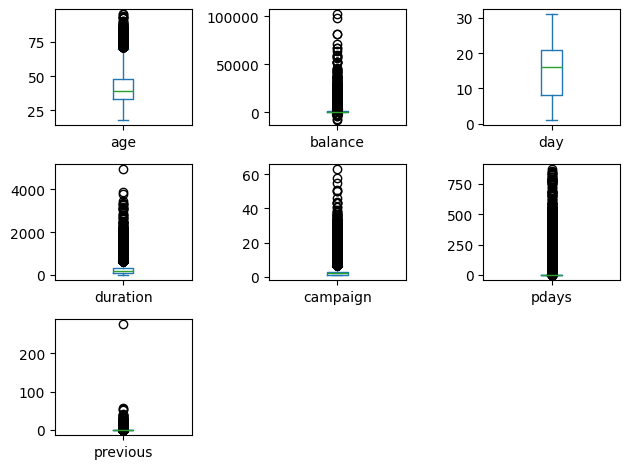

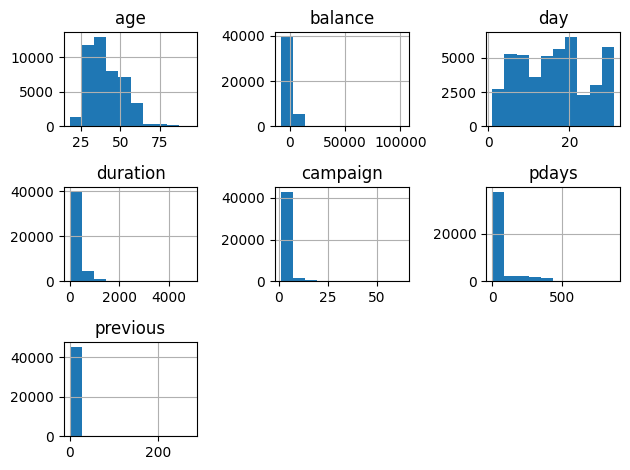

In [127]:
from pandas.plotting import scatter_matrix

# Show the box and whisker plot
df.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False)
plt.tight_layout() 
plt.show()

# Show the historigram
df.hist()  
plt.tight_layout() 
plt.show()

## Preprocessing. Prior transformations necessary for modeling

In [128]:
# Code that performs the necessary transformations to carry out the modeling processes.
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [129]:
# Además en el algoritmo de red neuronal se aplica el cambio de atributo categórico a numérico para su posterior entrenamiento
df.replace({'job':{'admin.': 0, 'unknown': 1, 'unemployed': 2, 'management': 3,'housemaid': 4, 'entrepreneur': 5, 'student': 6,
                    'blue-collar.': 7, 'blue-collar': 7, 'self-employed': 8, 'retired': 9, 'technician': 10,'services': 11 }}, inplace=True)
df.replace({'marital':{'married.': 0, 'married': 0, 'divorced': 1, 'single': 2}}, inplace=True)
df.replace({'education':{'unknown.': 0, 'unknown': 0, 'secondary': 1, 'primary': 2, 'tertiary': 3}}, inplace=True)
df.replace({'default': {'no': 0, 'yes': 1}}, inplace=True)
df.replace({'loan': {'no': 0, 'yes': 1}}, inplace=True)
df.replace({'housing': {'no': 0, 'yes': 1}}, inplace=True)
df.replace({'month':{'jan': 1, 'feb': 2, 'mar': 3,'apr': 4, 'may': 5, 'jun': 6,'jul': 7, 'aug': 8, 'sep': 9,
                      'oct': 10,'nov': 11, 'dec': 12 }}, inplace=True)

df.drop(columns=['contact', 'duration', 'campaign','pdays', 'previous', 'poutcome'], inplace=True)

C:\Users\hugor\AppData\Local\Temp\ipykernel_4528\259371888.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'job':{'admin.': 0, 'unknown': 1, 'unemployed': 2, 'management': 3,'housemaid': 4, 'entrepreneur': 5, 'student': 6,
C:\Users\hugor\AppData\Local\Temp\ipykernel_4528\259371888.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'marital':{'married.': 0, 'married': 0, 'divorced': 1, 'single': 2}}, inplace=True)
C:\Users\hugor\AppData\Local\Temp\ipykernel_4528\259371888.py:5: FutureWarning: Downcastin

In [130]:
# We made sure that there were no categorical variables
cols = ['age', 'job', 'marital', 'education', 'default',
        'balance', 'housing', 'loan', 'day', 'month']

for col in cols:
    print(f"{col}: {df[col].unique()}\n")

age: [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

job: [ 3 10  5  7  1  9  0 11  8  2  4  6]

marital: [0 2 1]

education: [3 1 0 2]

default: [0 1]

balance: [ 2143    29     2 ...  8205 14204 16353]

housing: [1 0]

loan: [0 1]

day: [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]

month: [ 5  6  7  8 10 11 12  1  2  3  4  9]



## Dividing the dataset into training data and test data

In [131]:
# Code that performs the split into training and test data, according to the planned evaluation strategy. Describe what that strategy is.
# In this section, the dataset is split into 80% training data and 20% test data. There are 11 columns, 10 of which are input attributes
# and one (y) is an output attribute (class)

# We import the functions and methods to be evaluated from Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# (Data division for models without a neural network) The dataset is divided into 80% training data and 20% test data because
# we have little data for training and evaluation, for this reason a large number of training data points are chosen.

array = df.values
X = array[:,0:10] 
y = array[:,10] 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# (Data division for models with a neural network) The dataset is divided into 80% training data and 20% test data because
# we have little data for training and evaluation, for this reason a large number of training data points are chosen.

train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

# In addition, the neural network algorithm applies the change from categorical to numerical attribute for subsequent training
train_dataset.replace({'y': {'no': 0, 'yes': 1}}, inplace=True)
test_dataset.replace({'y': {'no': 0, 'yes': 1}}, inplace=True)

C:\Users\hugor\AppData\Local\Temp\ipykernel_4528\2042380874.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_dataset.replace({'y': {'no': 0, 'yes': 1}}, inplace=True)
C:\Users\hugor\AppData\Local\Temp\ipykernel_4528\2042380874.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_dataset.replace({'y': {'no': 0, 'yes': 1}}, inplace=True)


## Neural network architecture proposal

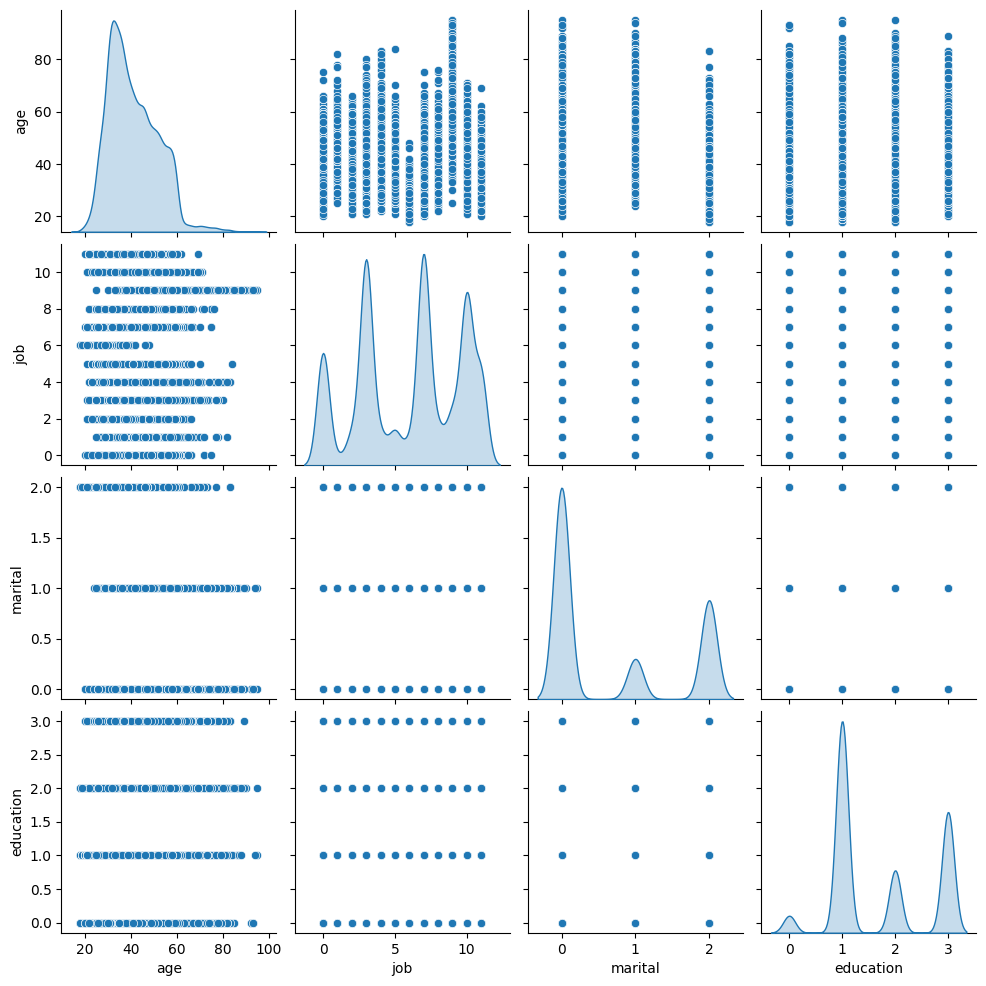

In [132]:
sns.pairplot(train_dataset[["age", "job", "marital", "education"]], diag_kind="kde")

In [133]:
# We removed the 'y' column from the 'train_stats' data.

train_stats = train_dataset.describe()
train_stats.pop("y")
train_stats = train_stats.transpose()

In [134]:
# The column we want to predict (y) is extracted from the training data and assigned to the variables 'train_labels' and 'test_labels'

train_labels = train_dataset.pop('y')
test_labels = test_dataset.pop('y')

In [135]:
# Network structuring code

def build_model():
   model = keras.Sequential([
     layers.Dense(64,input_shape=(10,)),
     layers.Dense(128, activation="relu"),
     layers.Dense(128, activation="relu"),
     layers.Dense(2, activation="softmax")
   ])
   model.compile(optimizer="adam",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
   return model

In [136]:
# Network model inspection code
model = build_model()
model.summary()

c:\Users\hugor\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,794 (100.76 KB)

 Trainable params: 25,794 (100.76 KB)

 Non-trainable params: 0 (0.00 B)

As you can see, the model has been builded with layers: an input layer, two intermediate layers, and a final layer.

The input layer has of 64 neurons.
The two intermediate layers each have 128 neurons.
The final layer has two neurons (the two output classes).

The activation function used for the intermediate layers is 'relu'. Its main purpose is to avoid introducing linearity into the model, which is essential for learning complex relationships in the data. For the output layer, the activation function is 'softmax', which is used in multiclass classification problems. This function gives us the probability of the possible classes (the sum of the probabilities of all classes equals 1).

## Adjustment of the ANN Classification Model

In [137]:
# Adjustment and training code
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',         
    patience=10,                # Number of epochs without stop if it doesn't get better
    restore_best_weights=True,  # Restore the best weight when fisished
    verbose=1                   # Show message when training stop 
)

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 100

# Training the model
history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,
  callbacks=[early_stopping])

results_ANN = history.history['accuracy']

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8178 - loss: 7.0763 - val_accuracy: 0.8825 - val_loss: 0.5820
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8568 - loss: 0.9216 - val_accuracy: 0.8825 - val_loss: 0.4488
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8766 - loss: 0.4890 - val_accuracy: 0.8825 - val_loss: 0.4379
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8763 - loss: 0.4044 - val_accuracy: 0.8825 - val_loss: 0.3595
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8827 - loss: 0.3703 - val_accuracy: 0.8825 - val_loss: 0.3680
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8806 - loss: 0.3892 - val_accuracy: 0.8825 - val_loss: 0.3603
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8809 - loss: 0.3935 - val_accuracy: 0.8825 - val_loss: 0.3778
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8768 - loss: 0.4136 - val_accu

## Evaluation of an ANN Model

### Visualize the model training progress and display evaluation statistics for the training and validation sets.

In [138]:
# Proposed network evaluation code (training and validation)
media = np.mean(results_ANN)
print("Media:", media)

max_val = np.max(results_ANN)
print("Highest value:", max_val)

train_loss, train_acc = model.evaluate(train_dataset, train_labels,
verbose=2)
print("\nTrain accuracy:", train_acc,train_loss)


Media: 0.8796651473751774
Highest value: 0.8836702704429626
1131/1131 - 2s - 1ms/step - accuracy: 0.8834 - loss: 0.3511

Train accuracy: 0.8834360837936401 0.3511474132537842


### Evaluate the results for the test dataset.

In [139]:
# Propose network evaluation code (evaluation test dataset)

test_loss, test_acc = model.evaluate(test_dataset, test_labels,
verbose=2)
print("\nTest accuracy:", test_acc, test_loss)

283/283 - 0s - 2ms/step - accuracy: 0.8813 - loss: 0.3571

Test accuracy: 0.8813315629959106 0.35710060596466064


## Adjustment of alternative classification models

In [140]:
# Classification model adjustment code 1 (DecisionTreeClassifier)

model_1 = DecisionTreeClassifier()
model_1.fit(X_train, Y_train)
predictions_1 = model_1.predict(X_validation)

# Use cross-validation 10 times
kfold_1 = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
results_DTC= cross_val_score(model_1, X_train, Y_train, cv=kfold_1, scoring='accuracy')
print('CART: %f (%f)' % (results_DTC.mean(), results_DTC.std()))

CART: 0.821306 (0.003112)


In [141]:
# Classification model adjustment code 2 (AdaBoostClassifier)
base_model = DecisionTreeClassifier()

model_2 = AdaBoostClassifier(estimator=base_model, n_estimators=100, random_state=42, algorithm='SAMME')
model_2.fit(X_train, Y_train)
predictions_2 = model_2.predict(X_validation)

# Use cross-validation 10 times
kfold_2 = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
results_ABC= cross_val_score(model_2, X_train, Y_train, cv=kfold_2, scoring='accuracy')
print('AdaBoost: %f (%f)' % (results_ABC.mean(), results_ABC.std()))

AdaBoost: 0.826007 (0.005185)


We see that all the models have very high accuracy, indicating that they have been trained correctly. We observe that the neural network had a higher peak accuracy, but its range of results was also wider, thus lowering the percentage of correct answers. On the other hand, the models without a neural network performed very efficiently in the classification problem, with the 'AdaBoostClassifier' model achieving slightly higher accuracy.

## Comparison of Model Performance

The results obtained by the different chosen algorithms are shown graphically and compared/overlaid.

In [142]:
print('RedNeuronal: %.6f (%.6f)' % (test_acc,test_loss))
print('CART: %f (%f)' % (results_DTC.mean(), results_DTC.std()))
print('AdaBoost: %f (%f)' % (results_ABC.mean(), results_ABC.std()))

RedNeuronal: 0.881332 (0.357101)
CART: 0.821306 (0.003112)
AdaBoost: 0.826007 (0.005185)


In [143]:
# Code to display a table comparing the performance metrics of the two proposals

# Performance code classification model 1 (DecisionTreeClassifier)
print('Classification report DecisionTreeClassifier')
print(classification_report(Y_validation, predictions_1))
print('----------------')

# Performance code classification model 2 (AdaBoostClassifier)
print('Classification report AdaBoostClassifier')
print(classification_report(Y_validation, predictions_2))
print('----------------')

Classification report DecisionTreeClassifier
              precision    recall  f1-score   support

          no       0.91      0.89      0.90      7993
         yes       0.26      0.29      0.27      1050

    accuracy                           0.82      9043
   macro avg       0.58      0.59      0.59      9043
weighted avg       0.83      0.82      0.82      9043

----------------
Classification report AdaBoostClassifier
              precision    recall  f1-score   support

          no       0.91      0.90      0.90      7993
         yes       0.28      0.30      0.29      1050

    accuracy                           0.83      9043
   macro avg       0.59      0.60      0.60      9043
weighted avg       0.83      0.83      0.83      9043

----------------


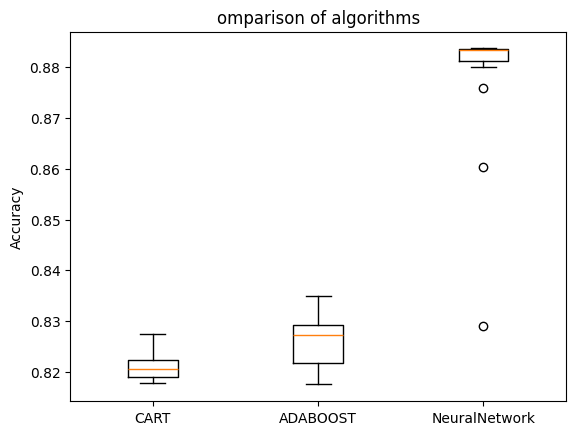

In [144]:
# Código para mostrar la comparación de métricas de desempeño de las tres propuestas en gráfica

results = [results_DTC, results_ABC, results_ANN]
names = ['CART','ADABOOST', 'NeuralNetwork']

# omparison of algorithms
plt.boxplot(results, tick_labels=names)
plt.title('omparison of algorithms')
plt.ylabel('Accuracy')
plt.show()
